<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/01_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self Learning Resource**
1. Tutorial on Pycaret <a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a> 

2. Documentation on Pycaret-Regression: <a href="https://pycaret.org/regression/"> Click Here </a>

---

### **In this tutorial we will learn:**

- Getting Data: How to import data from PyCaret repository
- Setting up Environment: How to setup an experiment in PyCaret and get started with building regression models
- Create Model: How to create a model, perform cross validation and evaluate regression metrics
- Tune Model: How to automatically tune the hyperparameters of a regression model
- Plot Model: How to analyze model performance using various plots
- Finalize Model: How to finalize the best model at the end of the experiment
- Predict Model: How to make prediction on new / unseen data
- Save / Load Model: How to save / load a model for future use

---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.1'

---
# **1. Regression: Basics**
---

### **1.1 Loading Dataset - Loading dataset from pycaret**

In [3]:
from pycaret.datasets import get_data
# No output

---
### **1.2 Get the list of datasets available in pycaret (55)**
---

In [4]:
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.3 Get boston dataset**
---

In [5]:
bostonDataSet = get_data("boston")    # SN is 46
# This is regression dataset.
# The values in medv are continuous values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### **Read data from file**

In [6]:
# import pandas as pd
# bostonDataSet = pd.read_csv("myFile.csv")

---
### **1.4 Parameter setting for all regression models**
- Train/Test division
- Sampling
- Normalization
- Transformation
- PCA (Dimention Reduction)
- Handaling of Outliers
- Feature Selection
---

In [7]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', silent=True)

,Description,Value
0,session_id,1403
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


---
### **1.5 Run and compare the Model Performance**
---

In [8]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2160,11.2149,3.2672,0.8424,0.1417,0.1104,0.442
gbr,Gradient Boosting Regressor,2.2341,11.4374,3.2843,0.8389,0.1485,0.1142,0.088
lightgbm,Light Gradient Boosting Machine,2.3484,12.5250,3.4378,0.8284,0.1508,0.1161,0.077
rf,Random Forest Regressor,2.3201,13.1447,3.5215,0.8188,0.1530,0.1163,0.507
ada,AdaBoost Regressor,2.9551,17.7573,4.1236,0.7539,0.1875,0.1546,0.088
dt,Decision Tree Regressor,2.9762,19.9541,4.3527,0.7198,0.1823,0.1466,0.017
lr,Linear Regression,3.4446,25.3250,4.8988,0.6524,0.2408,0.1717,0.267
ridge,Ridge Regression,3.4220,25.3562,4.8930,0.6522,0.2498,0.1711,0.012
br,Bayesian Ridge,3.4051,25.6221,4.9113,0.6502,0.2463,0.1709,0.013
huber,Huber Regressor,3.3036,27.6669,5.0324,0.6195,0.2480,0.1691,0.036


---
### **1.6 Three line of code for model comparison for "Insurance" dataset**
---

In [9]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
s = setup(data = insuranceDataSet, target='charges', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2557.2237,2.071453e+07,4499.4531,0.8543,0.4398,0.3086,0.084
rf,Random Forest Regressor,2733.8393,2.334415e+07,4793.1467,0.8358,0.4702,0.3301,0.537
lightgbm,Light Gradient Boosting Machine,2866.2263,2.379876e+07,4826.2495,0.8332,0.5240,0.3577,0.048
et,Extra Trees Regressor,2744.0459,2.653980e+07,5099.0247,0.8162,0.4874,0.3271,0.496
ada,AdaBoost Regressor,4541.0884,2.925245e+07,5385.3686,0.7898,0.6548,0.7937,0.035
ridge,Ridge Regression,4306.3801,3.741431e+07,6076.4267,0.7399,0.5988,0.4343,0.013
llar,Lasso Least Angle Regression,4292.3622,3.738854e+07,6074.9498,0.7399,0.5845,0.4324,0.015
br,Bayesian Ridge,4304.2708,3.741554e+07,6076.7075,0.7398,0.6290,0.4339,0.013
lr,Linear Regression,4297.0707,3.742232e+07,6077.8394,0.7396,0.5845,0.4324,0.013
lasso,Lasso Regression,4297.4186,3.741871e+07,6077.5769,0.7396,0.5883,0.4326,0.015


---
### **1.7 Three line of code for model comparison for "House" dataset**
---

In [10]:
from pycaret.datasets import get_data
from pycaret.regression import *

houseDataSet = get_data("house")
s = setup(data = houseDataSet, target='SalePrice', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.788975e+04,9.538394e+08,3.015357e+04,8.546000e-01,0.1478,0.1037,0.224
gbr,Gradient Boosting Regressor,1.753618e+04,9.531646e+08,2.983110e+04,8.523000e-01,0.1414,0.1012,0.699
rf,Random Forest Regressor,1.896599e+04,1.086923e+09,3.223299e+04,8.329000e-01,0.1598,0.1131,2.245
et,Extra Trees Regressor,2.204662e+04,1.430552e+09,3.726900e+04,7.780000e-01,0.1770,0.1264,2.367
ridge,Ridge Regression,1.975240e+04,1.391134e+09,3.488237e+04,7.711000e-01,0.1829,0.1172,0.048
omp,Orthogonal Matching Pursuit,1.790475e+04,1.412711e+09,3.447183e+04,7.640000e-01,0.1661,0.1035,0.037
ada,AdaBoost Regressor,2.695117e+04,1.568498e+09,3.901005e+04,7.622000e-01,0.2155,0.1761,0.454
en,Elastic Net,2.126135e+04,1.677530e+09,3.820227e+04,7.292000e-01,0.1704,0.1234,0.198
lasso,Lasso Regression,2.040500e+04,1.626385e+09,3.761274e+04,7.276000e-01,0.1969,0.1206,0.189
dt,Decision Tree Regressor,2.833304e+04,2.077960e+09,4.535955e+04,6.652000e-01,0.2338,0.1658,0.062


---
# **2. Regression: Advance - 1**
---

### **2.1 Model Performance using data "Normalization"**

In [11]:
s = setup(data = bostonDataSet, target = 'medv', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0996,9.8327,3.0359,0.8850,0.1364,0.1049,0.451
gbr,Gradient Boosting Regressor,2.3118,12.1368,3.3671,0.8532,0.1519,0.1172,0.089
lightgbm,Light Gradient Boosting Machine,2.3677,12.6444,3.4176,0.8507,0.1579,0.1217,0.038
rf,Random Forest Regressor,2.3508,13.5102,3.5164,0.8423,0.1525,0.1178,0.491
ada,AdaBoost Regressor,2.7331,15.1858,3.7825,0.8243,0.1777,0.1450,0.088
knn,K Neighbors Regressor,2.9181,18.6726,4.1756,0.7934,0.1773,0.1380,0.061
br,Bayesian Ridge,3.4117,23.4595,4.7362,0.7227,0.2663,0.1743,0.014
huber,Huber Regressor,3.2733,24.1342,4.7611,0.7188,0.2826,0.1669,0.023
ridge,Ridge Regression,3.4715,23.6954,4.7698,0.7184,0.2695,0.1767,0.013
lr,Linear Regression,3.4917,23.8083,4.7836,0.7167,0.2706,0.1775,0.013


---
### **2.2 Model Performance using "Feature Selection"**
---

In [12]:
s = setup(data = bostonDataSet, target = 'medv', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1783,10.8670,3.1844,0.8588,0.1440,0.1130,0.444
rf,Random Forest Regressor,2.3472,12.7826,3.4598,0.8357,0.1620,0.1254,0.501
gbr,Gradient Boosting Regressor,2.2820,12.8089,3.3830,0.8304,0.1576,0.1203,0.088
lightgbm,Light Gradient Boosting Machine,2.5837,14.7868,3.7826,0.8036,0.1718,0.1329,0.036
ada,AdaBoost Regressor,2.8906,17.5619,4.1188,0.7782,0.1903,0.1575,0.089
lr,Linear Regression,3.4851,25.1100,4.9093,0.6963,0.2460,0.1773,0.014
lar,Least Angle Regression,3.4851,25.1100,4.9093,0.6963,0.2460,0.1773,0.015
ridge,Ridge Regression,3.4423,25.1712,4.9182,0.6955,0.2425,0.1759,0.013
br,Bayesian Ridge,3.4386,25.5411,4.9585,0.6926,0.2401,0.1759,0.013
dt,Decision Tree Regressor,3.3084,27.6389,5.0639,0.6712,0.2354,0.1736,0.016


---
### **2.3 Model Performance using "Outlier Removal"**
---

In [13]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1229,8.7801,2.8657,0.8764,0.1330,0.1079,0.086
et,Extra Trees Regressor,2.1172,9.6604,2.9779,0.8680,0.1306,0.1046,0.435
rf,Random Forest Regressor,2.2983,10.7116,3.1622,0.8519,0.1441,0.1155,0.510
lightgbm,Light Gradient Boosting Machine,2.3477,11.9544,3.3394,0.8324,0.1427,0.1134,0.035
ada,AdaBoost Regressor,2.8429,15.1345,3.7440,0.7977,0.1737,0.1482,0.088
dt,Decision Tree Regressor,3.0703,21.0246,4.4193,0.7162,0.1990,0.1581,0.015
lr,Linear Regression,3.2144,21.5626,4.5118,0.6986,0.2341,0.1599,0.013
ridge,Ridge Regression,3.1831,21.7222,4.5183,0.6979,0.2298,0.1588,0.013
lar,Least Angle Regression,3.2136,21.6186,4.5192,0.6977,0.2339,0.1598,0.017
br,Bayesian Ridge,3.1858,22.3376,4.5742,0.6924,0.2289,0.1588,0.014


---
### **2.4 Model Performance using "Transformation"**
---

In [14]:
s = setup(data = bostonDataSet, target = 'medv', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1894,9.9559,3.0423,0.8815,0.1376,0.1098,0.085
et,Extra Trees Regressor,2.1665,10.6244,3.1207,0.8775,0.1373,0.1067,0.442
rf,Random Forest Regressor,2.3956,13.5258,3.5264,0.8442,0.1546,0.1194,0.496
lightgbm,Light Gradient Boosting Machine,2.5523,14.4703,3.6847,0.8389,0.1666,0.1279,0.037
ada,AdaBoost Regressor,2.8109,15.1101,3.7637,0.8222,0.1808,0.1526,0.087
knn,K Neighbors Regressor,2.9496,19.7442,4.2502,0.7814,0.1815,0.1403,0.062
dt,Decision Tree Regressor,3.1355,21.9428,4.5713,0.7426,0.2019,0.1581,0.017
br,Bayesian Ridge,3.5675,23.6144,4.7822,0.7274,0.2302,0.1831,0.013
ridge,Ridge Regression,3.6157,23.8424,4.8075,0.7236,0.2326,0.1852,0.013
lr,Linear Regression,3.6357,23.9999,4.8237,0.7213,0.2337,0.1861,0.011


---
### **2.5 Model Performance using "PCA"**
---

In [15]:
s = setup(data = bostonDataSet, target = 'medv', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.4083,63.1226,7.7793,0.2989,0.3105,0.2622,0.396
rf,Random Forest Regressor,5.5819,62.8258,7.8099,0.2889,0.3145,0.2687,0.431
lightgbm,Light Gradient Boosting Machine,5.6004,63.6738,7.8713,0.2865,0.3166,0.2691,0.029
knn,K Neighbors Regressor,5.6747,63.9034,7.9109,0.2706,0.3141,0.2701,0.061
gbr,Gradient Boosting Regressor,5.5453,65.4080,7.9752,0.2616,0.3202,0.2674,0.056
lr,Linear Regression,5.8718,66.1277,8.0796,0.2524,0.3135,0.2745,0.012
lasso,Lasso Regression,5.8741,66.1317,8.0801,0.2524,0.3136,0.2747,0.013
ridge,Ridge Regression,5.8718,66.1277,8.0796,0.2524,0.3135,0.2745,0.011
en,Elastic Net,5.8730,66.1292,8.0798,0.2524,0.3135,0.2746,0.014
lar,Least Angle Regression,5.8718,66.1277,8.0796,0.2524,0.3135,0.2745,0.012


---
### **2.6 Model Performance using "Outlier Removal" + "Normalization"**
---

In [16]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1307,8.7756,2.9238,0.8736,0.1364,0.1075,0.085
rf,Random Forest Regressor,2.2358,9.6586,3.0233,0.8682,0.1337,0.1089,0.504
et,Extra Trees Regressor,2.1844,10.9317,3.0679,0.8567,0.1308,0.1047,0.431
lightgbm,Light Gradient Boosting Machine,2.3840,12.2816,3.3954,0.8338,0.1466,0.1159,0.036
ada,AdaBoost Regressor,2.7425,14.1743,3.6724,0.8016,0.1698,0.1421,0.090
knn,K Neighbors Regressor,2.8007,18.1711,4.0113,0.7675,0.1631,0.1270,0.061
dt,Decision Tree Regressor,2.9671,19.7886,4.3023,0.7294,0.1850,0.1440,0.015
br,Bayesian Ridge,3.3952,25.3600,4.8934,0.6588,0.2532,0.1642,0.013
ridge,Ridge Regression,3.4411,25.4268,4.9035,0.6571,0.2565,0.1664,0.014
lr,Linear Regression,3.4608,25.5449,4.9161,0.6553,0.2580,0.1674,0.012


---
### **2.7 Model Performance using "Outlier Removal" + "Normalization" + "Transformation"**
---

In [17]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.0472,7.3757,2.6856,0.8873,0.1366,0.1090,0.085
et,Extra Trees Regressor,2.0697,7.7301,2.7495,0.8849,0.1354,0.1092,0.430
rf,Random Forest Regressor,2.1477,8.3587,2.8616,0.8732,0.1421,0.1148,0.501
lightgbm,Light Gradient Boosting Machine,2.1861,9.3602,3.0111,0.8491,0.1507,0.1181,0.036
ada,AdaBoost Regressor,2.4510,10.2356,3.1731,0.8479,0.1642,0.1373,0.090
dt,Decision Tree Regressor,2.9414,14.6960,3.7906,0.7813,0.1879,0.1563,0.017
knn,K Neighbors Regressor,2.7859,14.7788,3.7745,0.7723,0.1729,0.1409,0.062
br,Bayesian Ridge,3.0478,16.6572,3.9989,0.7537,0.2278,0.1635,0.013
ridge,Ridge Regression,3.0746,16.6148,3.9948,0.7527,0.2266,0.1645,0.012
huber,Huber Regressor,3.0342,16.8725,4.0262,0.7526,0.2381,0.1599,0.025


---
### **2.8 Explore more parameters of setup() on pycaret**
---
- Explore setup() paramaeters in **Step 1.4**
- Documentation on Pycaret-Regression: <a href="https://pycaret.org/regression/"> Click Here </a>

---
# **3. Regression: Advance - 2**
---

### **3.1 Build a single model - "RandomForest"**

In [18]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
s = setup(data =  bostonDataSet, target='medv', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5843,11.5781,3.4027,0.8504,0.1573,0.1283
1,1.9183,8.5176,2.9185,0.9193,0.1632,0.1214
2,2.3039,10.7434,3.2777,0.9025,0.1393,0.1074
3,1.7738,5.0285,2.2424,0.9414,0.1107,0.0961
4,1.9847,7.2376,2.6903,0.9198,0.1220,0.1068
5,2.4499,12.5273,3.5394,0.7688,0.1297,0.1017
6,2.1609,12.3675,3.5167,0.8521,0.1611,0.1178
7,3.1981,27.0759,5.2035,0.7037,0.1972,0.1635
8,2.5345,15.5621,3.9449,0.8088,0.1581,0.1210
9,2.2872,9.4853,3.0798,0.9184,0.1276,0.1036


---
### **3.2 Other models**
---
-	'ada' - AdaBoost Regressor
-	'br' - Bayesian Ridge
-	'dt' - Decision Tree Regressor
-	'en'	- Elastic Net
-	'et' - Extra Trees Regressor
-	'gbr' - Gradient Boosting Regressor
-	'huber' - Huber Regressor
-	'knn' - K Neighbors Regressor
-	'llar' - Lasso Least Angle Regression
-	'lasso' - Lasso Regression
-	'lar' - Least Angle Regression
-	'lightgbm'	- Light Gradient Boosting Machine
-	'lr' - Linear Regression
-	'omp' - Orthogonal Matching Pursuit
-	'par' - Passive Aggressive Regressor
-	'rf' - Random Forest Regressor
-	'ridge' - Ridge Regression

---
### **3.3 Explore more parameters of create_model() on pycaret**
---
Documentation on Pycaret-Regression: <a href="https://pycaret.org/regression/"> Click Here </a> 

---
### **3.4 Save the trained model**
---

In [19]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Succesfully Saved


---
### **3.5 Load the model**
---

In [20]:
rfModel = load_model('rfModelFile')

Transformation Pipeline and Model Successfully Loaded


---
### **3.6 Make prediction on the new dataset**
---

### **Get new dataset**

In [21]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### **Make prediction on new dataset**

In [22]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.582000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.292000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.688000
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.865001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.350001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.553001
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.705000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,18.152000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,16.827000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,18.917000


---
### **3.7 Scatter plot b/w actual and predicted**
---

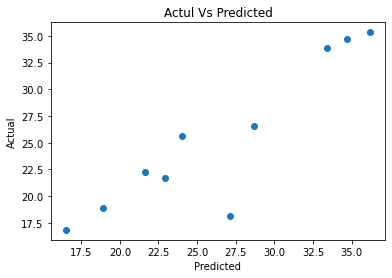

In [23]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **3.8 Save prediction results to csv**
---

In [24]:
newPredictions.to_csv("NewPredictions.csv")
# No output

---
### **3.9 Plot the Model**
---
Following parameter can be plot for model
- Prediction Error Plot    - 'error'
- Learning Curve           - 'learning'
- Validation Curve         - 'vc'
- Feature Importance       - 'feature'
- Model Hyperparameter     - 'parameter'

---
### **3.9.1 Create RandomForest or any other model**
---

In [25]:
rfModel = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5843,11.5781,3.4027,0.8504,0.1573,0.1283
1,1.9183,8.5176,2.9185,0.9193,0.1632,0.1214
2,2.3039,10.7434,3.2777,0.9025,0.1393,0.1074
3,1.7738,5.0285,2.2424,0.9414,0.1107,0.0961
4,1.9847,7.2376,2.6903,0.9198,0.1220,0.1068
5,2.4499,12.5273,3.5394,0.7688,0.1297,0.1017
6,2.1609,12.3675,3.5167,0.8521,0.1611,0.1178
7,3.1981,27.0759,5.2035,0.7037,0.1972,0.1635
8,2.5345,15.5621,3.9449,0.8088,0.1581,0.1210
9,2.2872,9.4853,3.0798,0.9184,0.1276,0.1036


---
### **3.9.2 Plot Error**
---

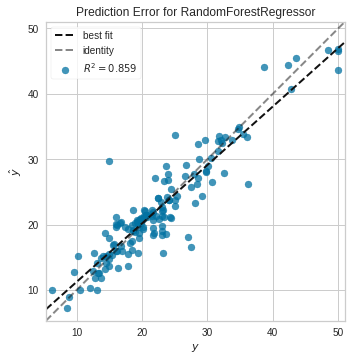

In [26]:
plot_model(rfModel, plot='error')

---
### **3.9.3 Plot Learning Curve**
---

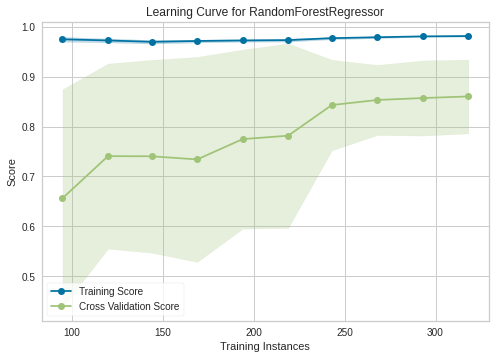

In [27]:
plot_model(rfModel, plot='learning')

---
### **3.9.4 Plot Validation Curve**
---

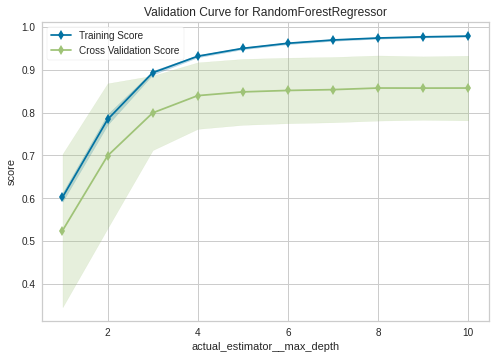

In [28]:
plot_model(rfModel, plot='vc')

---
### **3.9.5 Explore more parameters of plot_model() on pycaret**
---
Documentation on Pycaret-Regression: <a href="https://pycaret.org/regression/"> Click Here </a>

---
### **3.10 Feature Importance**
---

### **3.10.1 Feature Importance using Random Forest**

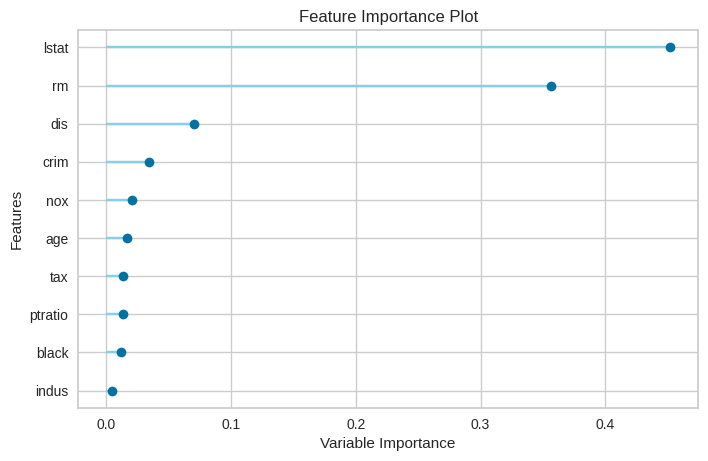

In [29]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **3.10.2 Feature Importance using Extra Trees Regressor**
---

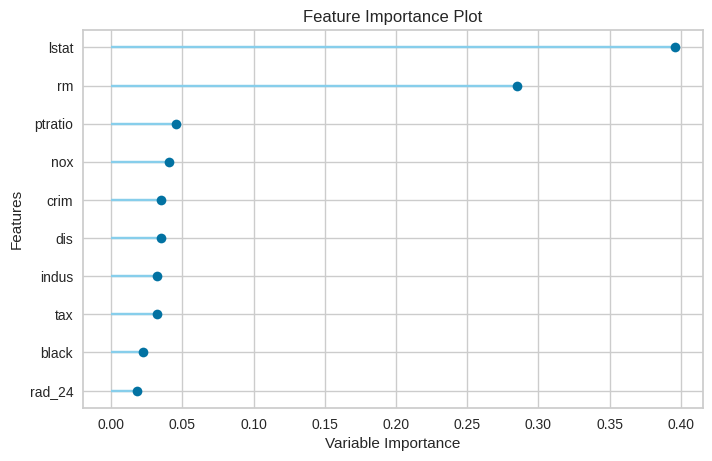

In [30]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **3.10.3 Feature Importance using Decision Tree**
---

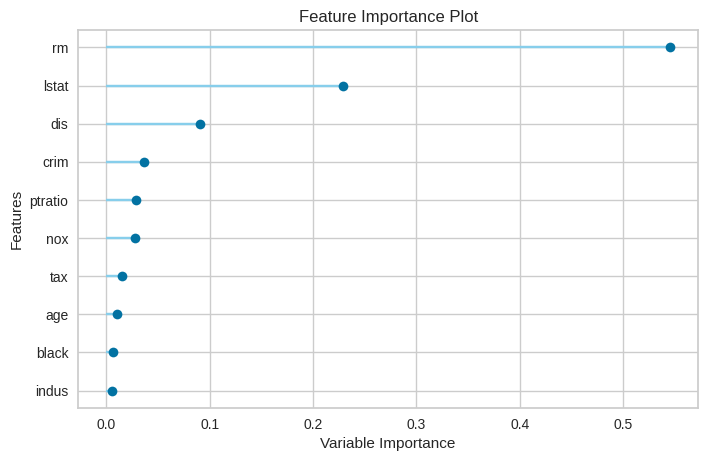

In [31]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
### **3.11 Deploy the model on AWS <a href="https://pycaret.org/regression#deploy-model">Click Here</a>**
---

### **Self Learning Resource**

1. Tutorial on Pycaret <a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a> 

2. Documentation on Pycaret-Regression: <a href="https://pycaret.org/regression/"> Click Here </a>